###MILESTONE 1

**Muhammad Galang Al-Hakim**

**Batch 004**

**DATASET AND TABLEU LINK**
1.   https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles
2.   https://public.tableau.com/app/profile/muhammad.galang.al.hakim/viz/Milestone_Dashboard1/Dashboard1?publish=yes
3.   https://public.tableau.com/app/profile/muhammad.galang.al.hakim/viz/Milestone_Dashboard2/Dashboard2?publish=yes


###BACKGORUND

**Transportasi merupakan penyumbang emisi gas rumah kaca yang signifikan di Kanada. Menurut Pemerintah Kanada, sektor transportasi menyumbang sekitar 25% dari total emisi gas rumah kaca Kanada, dengan kendaraan di jalan raya menjadi sumber emisi terbesar di sektor transportasi.
Karbon dioksida (CO2) adalah gas rumah kaca utama yang dipancarkan oleh kendaraan, dan dilepaskan ke atmosfer saat bahan bakar fosil dibakar untuk transportasi. Ini termasuk bensin dan solar yang digunakan oleh mobil, truk, bus, dan kendaraan lainnya.**

###PROBLEM STATEMENT

**Mengidentifikasi emisi karbon dari kendaraan di Canada dan untuk menganalisis rata-ratanya berdasarkan jenis kendaraan, tipe bahan bakar, dan konsumsi bahan bakar penggunaan di jalanan kota, tol dan kombinasi keduanya**

###POIN PENJABARAN MASALAH

*   Bagaimana distribusi emisi gas karbon berdasarkan kelas kendaraannya?
*   Berapa rata-rata konsumsi tertinggi penggunaan bahan bakar pada jalanan kota berdasarkan kelas kendaraan?
*   Berapa rata-rata konsumsi tertinggi penggunaan bahan bakar pada jalan tol berdasarkan kelas kendaraan?
*   Berapa rata-rata konsumsi tertinggi penggunaan bahan bakar yang dikombinasi berdasarkan kelas kendaraan?
*   Berapa rata-rata emisi gas karbon yang dihasilkan berdasarkan jenis bahan bakar?
*   (STATISTIK DESKRIPTIF) Berdasarkan kelas kendaraan dengan jumlah emisi gas karbon tertinggi  dan rata-rata keseluruhan, bagaimana distribusi nilainya?
*   (STATISTIK INFERENSIAL) Bagaimana emisi gas karbon kelas kendaraan tertentu dibandingkan dengan emisi gas karbon keseluruhan kelas kendaraan?





###WORKING AREA

**IMPORT LIBRARY**

**Import library yang digunakan untuk analisis data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

###DATA LOADING

**Pada sesi ini kita akan mengulik data yang simpel untuk memahami isi data**

In [ ]:
carbon = pd.read_csv('/content/CO2 Emissions_Canada.csv')
carbon

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
carbon.shape

(7385, 12)

Data ini memiliki 7385 baris dan 12 kolom

Memeriksa nilai deskriptif menggunakan .info() :

In [ ]:
carbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
carbon.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Memeriksa apakah ada nilai yang hilang dalam kumpulan data yang diperoleh

In [ ]:
carbon.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
carbon.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
carbon.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


Memeriksa merk mobil pada dataframe

In [ ]:
carbon['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

Memeriksa kelas kendaraan pada dataframe

In [ ]:
carbon['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

Memeriksa silinder mesin kendaraan pada dataframe

In [ ]:
carbon['Cylinders'].unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16])

Memeriksa transmisi kendaraan pada dataframe

In [ ]:
carbon['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

**Transmission Type**

*   A  : Automatic
*   AM : Automated Manual
*   AS : Automatic with select shift
*   AV : Continuously Variable
*   M  : Manual, number of gears/speeds (1-10)





In [ ]:
carbon['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

**Tipe konsumsi bahan bakar**

*   X = Regular gasoline
*   Z = Premium gasoline
*   E = E85 (Ethanol)
*   D = Diesel
*   N = Natural gas





In [ ]:
carbon['Fuel Type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

###DATA CLEANING

**Tidak ada missing value**

###DATA EXPLORATION

**POIN 1 Bagaimana distribusi emisi gas karbon berdasarkan kelas kendaraannya?**

Pada sesi ini kita ingin mengetahui distribusi emisi gas karbon yang dihasilkan dari kendaraan berdasarkan kelas kendaraan

In [ ]:
carbon_dist = carbon.groupby(carbon['Vehicle Class']).count()['CO2 Emissions(g/km)'].sort_values(ascending = False)
carbon_dist

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: CO2 Emissions(g/km), dtype: int64

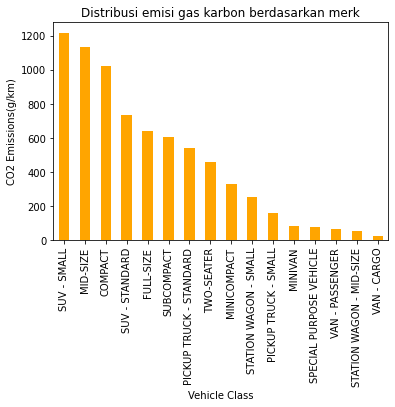

In [ ]:
carbon_dist.plot(kind='bar', xlabel = 'Vehicle Class', ylabel = 'CO2 Emissions(g/km)', title = 'Distribusi emisi gas karbon berdasarkan merk', color = 'orange')

Data yang didapat kelas kendaraan SUV - SMALL menghasilkan emisi gas karbon terbesar sebanyak 1217 (g/km)

**POIN 2 Berapa rata-rata konsumsi tertinggi penggunaan bahan bakar pada jalanan kota berdasarkan kelas kendaraan?**

Pada sesi ini kita ingin mengetahui rata-rata tertinggi konsumsi penggunaan bahan bakar pada jalanan kota berdasarkan kelas kendaraan

In [ ]:
vehicle_class_mean_fuel_jalankota = carbon.groupby(['Vehicle Class'])[['Fuel Consumption City (L/100 km)']].mean()
vehicle_class_mean_fuel_jalankota

,Fuel Consumption City (L/100 km)
Vehicle Class,
COMPACT,10.708611
FULL-SIZE,13.654617
MID-SIZE,11.100530
MINICOMPACT,11.567485
MINIVAN,13.755000
PICKUP TRUCK - SMALL,13.089937
PICKUP TRUCK - STANDARD,15.699814
SPECIAL PURPOSE VEHICLE,11.974026
STATION WAGON - MID-SIZE,11.624528


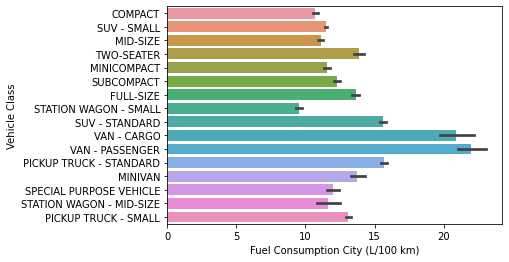

In [ ]:
sns.barplot(data=carbon, x='Fuel Consumption City (L/100 km)', y='Vehicle Class')

Data yang didapat dari konsumsi bahan bakar tertinggi penggunaan pada jalanan kota yaitu kelas kendaraan VAN - PASSENGER sebanyak 21.998485 (L/100 Km)

**POIN 3 Berapa rata-rata tertinggi konsumsi penggunaan bahan bakar pada jalan tol berdasarkan jenis kendaraan?**

Pada sesi ini kita ingin mengetahui rata-rata tertinggi konsumsi penggunaan bahan bakar pada jalan tol berdasarkan kelas kendaraan

In [ ]:
vehicle_class_mean_fuel_jalantol = carbon.groupby(['Vehicle Class'])[['Fuel Consumption Hwy (L/100 km)']].mean()
vehicle_class_mean_fuel_jalantol

,Fuel Consumption Hwy (L/100 km)
Vehicle Class,
COMPACT,7.675147
FULL-SIZE,9.156651
MID-SIZE,7.789585
MINICOMPACT,8.457362
MINIVAN,9.706250
PICKUP TRUCK - SMALL,10.034591
PICKUP TRUCK - STANDARD,11.649628
SPECIAL PURPOSE VEHICLE,9.302597
STATION WAGON - MID-SIZE,8.501887


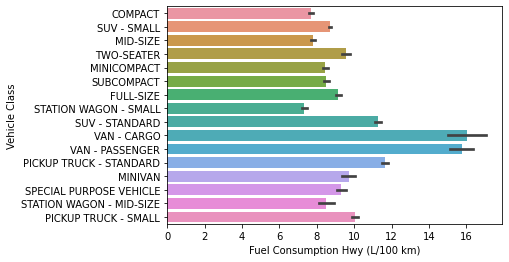

In [ ]:
sns.barplot(data=carbon, x='Fuel Consumption Hwy (L/100 km)', y='Vehicle Class')

Data yang didapat dari konsumsi bahan bakar tertinggi penggunaan pada jalan tol yaitu kelas kendaraan VAN - CARGO sebanyak 16.059091 (L/100 Km)

**POIN 4 Berapa rata-rata tertinggi konsumsi penggunaan bahan bakar yang dikombinasi berdasarkan jenis kendaraan?**

Pada sesi ini kita ingin mengetahui rata-rata tertinggi konsumsi penggunaan bahan bakar pada jalanan yang dikombinasi berdasarkan kelas kendaraan

In [ ]:
vehicle_class_mean_fuel_kombinasi = carbon.groupby(['Vehicle Class'])[['Fuel Consumption Comb (L/100 km)']].mean()
vehicle_class_mean_fuel_kombinasi

,Fuel Consumption Comb (L/100 km)
Vehicle Class,
COMPACT,9.343933
FULL-SIZE,11.633646
MID-SIZE,9.609356
MINICOMPACT,10.168712
MINIVAN,11.935000
PICKUP TRUCK - SMALL,11.717610
PICKUP TRUCK - STANDARD,13.880855
SPECIAL PURPOSE VEHICLE,10.763636
STATION WAGON - MID-SIZE,10.232075


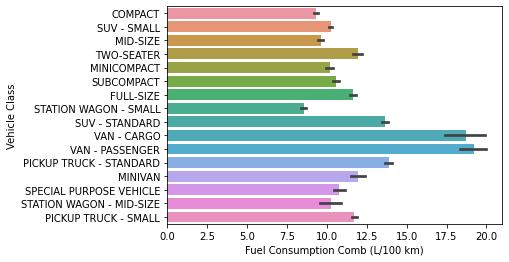

In [ ]:
sns.barplot(data=carbon, x='Fuel Consumption Comb (L/100 km)', y='Vehicle Class')

Data yang didapat dari konsumsi bahan bakar tertinggi penggunaan pada jalan tol dan jalanan kota yaitu kelas kendaraan VAN - PASSENGER sebanyak 19.192424 (L/100 Km)

**POIN 5 Berapa rata-rata emisi gas karbon yang dihasilkan berdasarkan jenis bahan bakar?**

Pada sesi ini kita ingin mengetahui rata-rata tertinggi emisi gas karbon berdasarkan tipe bahan bakar

In [ ]:
fuel = carbon.groupby(['Fuel Type'])[['CO2 Emissions(g/km)']].mean()
fuel

,CO2 Emissions(g/km)
Fuel Type,
D,237.548571
E,275.091892
N,213.000000
X,235.119329
Z,266.043410


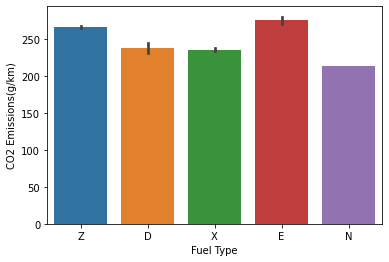

In [ ]:
sns.barplot(data=carbon, x='Fuel Type', y='CO2 Emissions(g/km)')

Data yang didapat dari rata-rata tertinggi emisi gas karbon berdasarkan tipe bahan bakar yaitu tipe bahan bakar E = E85 (Ethanol) sebanyak 275.091892 (g/km)

**CENTRAL TENDENCY**

**POIN 6 Berdasarkan merk dengan jumlah emisi gas karbon tertinggi, bagaimana distribusi nilainya?**

In [ ]:
carbon_desc = carbon[(carbon['Vehicle Class']=='SUV - SMALL')].sort_values('CO2 Emissions(g/km)', ascending = False)
carbon_desc

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4051,MERCEDES-BENZ,AMG GLC 43 4MATIC COUPE,SUV - SMALL,3.0,6,A9,Z,17.4,11.1,14.6,19,353
6623,BMW,X3 M,SUV - SMALL,3.0,6,AS8,Z,16.6,12.1,14.6,19,339
6624,BMW,X3 M Competition,SUV - SMALL,3.0,6,AS8,Z,16.6,12.1,14.6,19,339
6628,BMW,X4 M Competition,SUV - SMALL,3.0,6,AS8,Z,16.6,12.1,14.6,19,339
6627,BMW,X4 M,SUV - SMALL,3.0,6,AS8,Z,16.6,12.1,14.6,19,339
...,...,...,...,...,...,...,...,...,...,...,...,...
6447,TOYOTA,RAV4 Hybrid AWD,SUV - SMALL,2.5,4,AV6,X,5.8,6.3,6.0,47,140
7347,TOYOTA,RAV4 Hybrid AWD,SUV - SMALL,2.5,4,AV,X,5.7,6.3,6.0,47,139
6787,FORD,Escape Hybrid AWD,SUV - SMALL,2.5,4,AV,X,5.5,6.4,5.9,48,139
6786,FORD,Escape Hybrid,SUV - SMALL,2.5,4,AV,X,5.4,6.3,5.8,49,136


In [ ]:
print('Mean :', carbon_desc['CO2 Emissions(g/km)'].mean())
print('Median :', carbon_desc['CO2 Emissions(g/km)'].median())
print('Mode :', carbon_desc['CO2 Emissions(g/km)'].mode()[0])
print('Minimum :', carbon_desc['CO2 Emissions(g/km)'].min())
print('Max :', carbon_desc['CO2 Emissions(g/km)'].max())
print('Standard Deviation :', carbon_desc['CO2 Emissions(g/km)'].std())

Mean : 236.29252259654888
Median : 233.0
Mode : 230
Minimum : 128
Max : 353
Standard Deviation : 31.217718352055254


Pengecekan data normal atau skew

In [ ]:
carbon_desc['CO2 Emissions(g/km)'].skew()

0.34462963929570023

Hasil didapat data ini adalah normal karena, masi didalam range -0,5 - 0,5  artinya data normal

**POIN 7 Bagaimana emisi gas karbon merk tertentu dibandingkan dengan emisi gas karbon keseluruhan merk?**

Dari analisis kami sebelumnya dalam distribusi kelas kendaraan SUV - SMALL, di bagian ini kami ingin mengetahui bagaimana emisi gas karbon rata-rata kelas kendaraan ini dibandingkan dengan emisi gas karbon rata-rata keseluruhan dalam dataframe. Untuk itu kita harus melakukan pengujian hipotesis dengan menggunakan 2 tailed 2 sample.

Sehingga seperti yang dapat kita lihat di bawah ini kita menggunakan t-test 2 sample 2 tailed dengan deklarasi sebagai berikut :

- H0 : &mu; SUV - SMALL Vehicle Class = &mu; Whole Vehicle Class

- H1 : &mu; SUV - SMALL Vehicle Class != &mu; Whole Vehicle Class

In [ ]:
t_stat, p_val = stats.ttest_ind(carbon_desc['CO2 Emissions(g/km)'], carbon['CO2 Emissions(g/km)'])
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 9.510449442343919e-17
t-statistics: -8.3277004405511


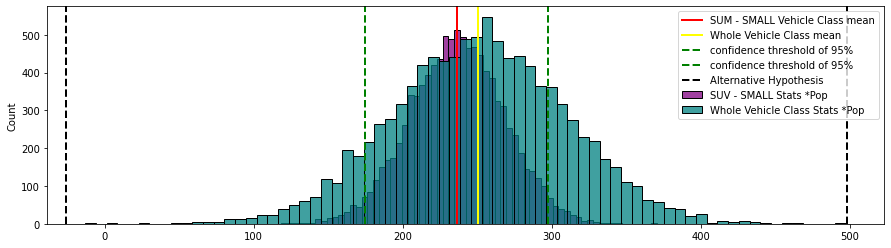

In [ ]:
# simulation using random generated numbers
carbon_desc_pop = np.random.normal(carbon_desc['CO2 Emissions(g/km)'].mean(),carbon_desc['CO2 Emissions(g/km)'].std(),10000)
carbon_pop = np.random.normal(carbon['CO2 Emissions(g/km)'].mean(),carbon['CO2 Emissions(g/km)'].std(),10000)

# confidence interval based on SUV - SMALL
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, carbon_desc['CO2 Emissions(g/km)'].mean(), carbon_desc['CO2 Emissions(g/km)'].std())

plt.figure(figsize=(15,4))
sns.histplot(carbon_desc_pop, label='SUV - SMALL Stats *Pop',color='purple')
sns.histplot(carbon_pop, label='Whole Vehicle Class Stats *Pop',color='teal')

# mean
plt.axvline(carbon_desc['CO2 Emissions(g/km)'].mean(), color='red', linewidth=2, label='SUM - SMALL Vehicle Class mean')
plt.axvline(carbon['CO2 Emissions(g/km)'].mean(), color='yellow',  linewidth=2, label='Whole Vehicle Class mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(carbon_desc_pop.mean()+t_stat*carbon_desc_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(carbon_desc_pop.mean()-t_stat*carbon_desc_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Dari hasil uji T dapat disimpulkan pada data yang diberikan bahwa hasil hipotesisnya adalah menolak H0 yang berarti bahwa emisi gas karbon rata-rata  `SUM - SMALL` tidak sama dengan `seluruh emisi gas karbon kelas kendaraan`, atau dalam bahasa lain ada <mark>Perbedaan Signifikan</mark> antara emisi gas karbon rata-rata `SUV - SMALL` dan emisi gas karbon rata-rata `seluruh emisi gas karbon kelas kendaraan`.

###KESIMPULAN

*   Data yang didapat kelas kendaraan SUV - SMALL menghasilkan emisi gas karbon terbesar sebanyak 1217 (g/km)
*   Data yang didapat dari konsumsi bahan bakar tertinggi penggunaan pada jalanan kota yaitu kelas kendaraan VAN - PASSENGER sebanyak 21.998485 (L/100 Km)
*   Data yang didapat dari konsumsi bahan bakar tertinggi penggunaan pada jalan tol yaitu kelas kendaraan VAN - CARGO sebanyak 16.059091 (L/100 Km)
*   Data yang didapat dari konsumsi bahan bakar tertinggi penggunaan pada jalan tol dan jalanan kota yaitu kelas kendaraan VAN - PASSENGER sebanyak 19.192424 (L/100 Km)
*   Data yang didapat dari rata-rata tertinggi emisi gas karbon berdasarkan tipe bahan bakar yaitu tipe bahan bakar E = E85 (Ethanol) sebanyak 275.091892 (g/km)
*   Hasil didapat data ini adalah normal karena, masi didalam range -0,5 - 0,5 artinya data normal
*   Dari hasil uji T dapat disimpulkan pada data yang diberikan bahwa hasil hipotesisnya adalah menolak H0 yang berarti bahwa emisi gas karbon rata-rata  `SUM - SMALL` tidak sama dengan `seluruh emisi gas karbon kelas kendaraan`, atau dalam bahasa lain ada <mark>Perbedaan Signifikan</mark> antara emisi gas karbon rata-rata `SUV - SMALL` dan emisi gas karbon rata-rata `seluruh emisi gas karbon kelas kendaraan`.







In [ ]:
carbon.to_csv('Tabelu_milestone.csv')